In [1]:
import sys
from pathlib import Path

project_root = Path().resolve().parent
sys.path.append(str(project_root))


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from src.database.postgres_session import get_postgres_connection
engine = get_postgres_connection()

In [4]:
df = pd.read_sql('''select * from customer_churn_summary''', engine)

In [5]:
df

,acct_id,years,churn,risk,currency,ave_bal,scheme,mobile_app,internet_banking,ussd_banking,digital_loan,unsecured_loan,termloan,credit_card,subsegment,credit_vol,debit_vol,debit_val,credit_val,digital_channels_used
0,Account_0,10,0,LOW,NGN,302.34,ODA,0,0,0,0,0,0,0,product7,0,0,0.00,0.0,0
1,Account_1,7,1,LOW,NGN,640.55,SBA,1,1,0,0,0,0,0,product7,23,84,1641781.54,1650610.0,2
2,Account_2,12,1,MEDIUM,NGN,2549.96,SBA,0,0,1,0,0,0,0,product6,0,2,5427.50,0.0,1
3,Account_3,12,0,MEDIUM,USD,9999.17,ODA,0,1,1,0,0,0,0,product6,0,0,0.00,0.0,2
4,Account_4,12,1,MEDIUM,NGN,455.25,SBA,1,1,1,0,0,0,0,product8,439,116,6768632.00,6784830.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433981,Account_489069,5,0,MEDIUM,NGN,3046.39,SBA,0,0,0,0,0,0,0,product6,0,0,0.00,0.0,0
433982,Account_489070,8,0,MEDIUM,NGN,106.60,ODA,0,0,0,0,0,0,0,product7,0,0,0.00,0.0,0
433983,Account_489071,9,1,LOW,NGN,33.72,SBA,0,0,1,0,0,0,0,product5,142,91,296204.03,294710.0,1
433984,Account_489072,4,0,LOW,NGN,60.58,SBA,1,0,1,0,0,0,0,product5,0,0,0.00,0.0,2


# Exploratory Data Analysis

- Here we will analyze the summary table to gain insights into the distribution of each column. This will help us to understand underlying data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
years,433986.0,6.356700e+00,3.576826e+00,0.0,4.00,6.00,9.000000e+00,1.200000e+01
churn,433986.0,5.507620e-01,4.974171e-01,0.0,0.00,1.00,1.000000e+00,1.000000e+00
ave_bal,433986.0,1.691059e+05,1.242282e+07,-689000000.0,209.43,1091.03,7.113312e+03,7.693634e+09
mobile_app,433986.0,3.447254e-01,4.752792e-01,0.0,0.00,0.00,1.000000e+00,1.000000e+00
internet_banking,433986.0,4.107206e-01,4.919652e-01,0.0,0.00,0.00,1.000000e+00,1.000000e+00
ussd_banking,433986.0,4.991567e-01,4.999999e-01,0.0,0.00,0.00,1.000000e+00,1.000000e+00
digital_loan,433986.0,2.609301e-02,1.594121e-01,0.0,0.00,0.00,0.000000e+00,1.000000e+00
unsecured_loan,433986.0,1.020770e-02,1.005163e-01,0.0,0.00,0.00,0.000000e+00,1.000000e+00
termloan,433986.0,5.253626e-04,2.291479e-02,0.0,0.00,0.00,0.000000e+00,1.000000e+00
credit_card,433986.0,2.083017e-03,4.559257e-02,0.0,0.00,0.00,0.000000e+00,1.000000e+00


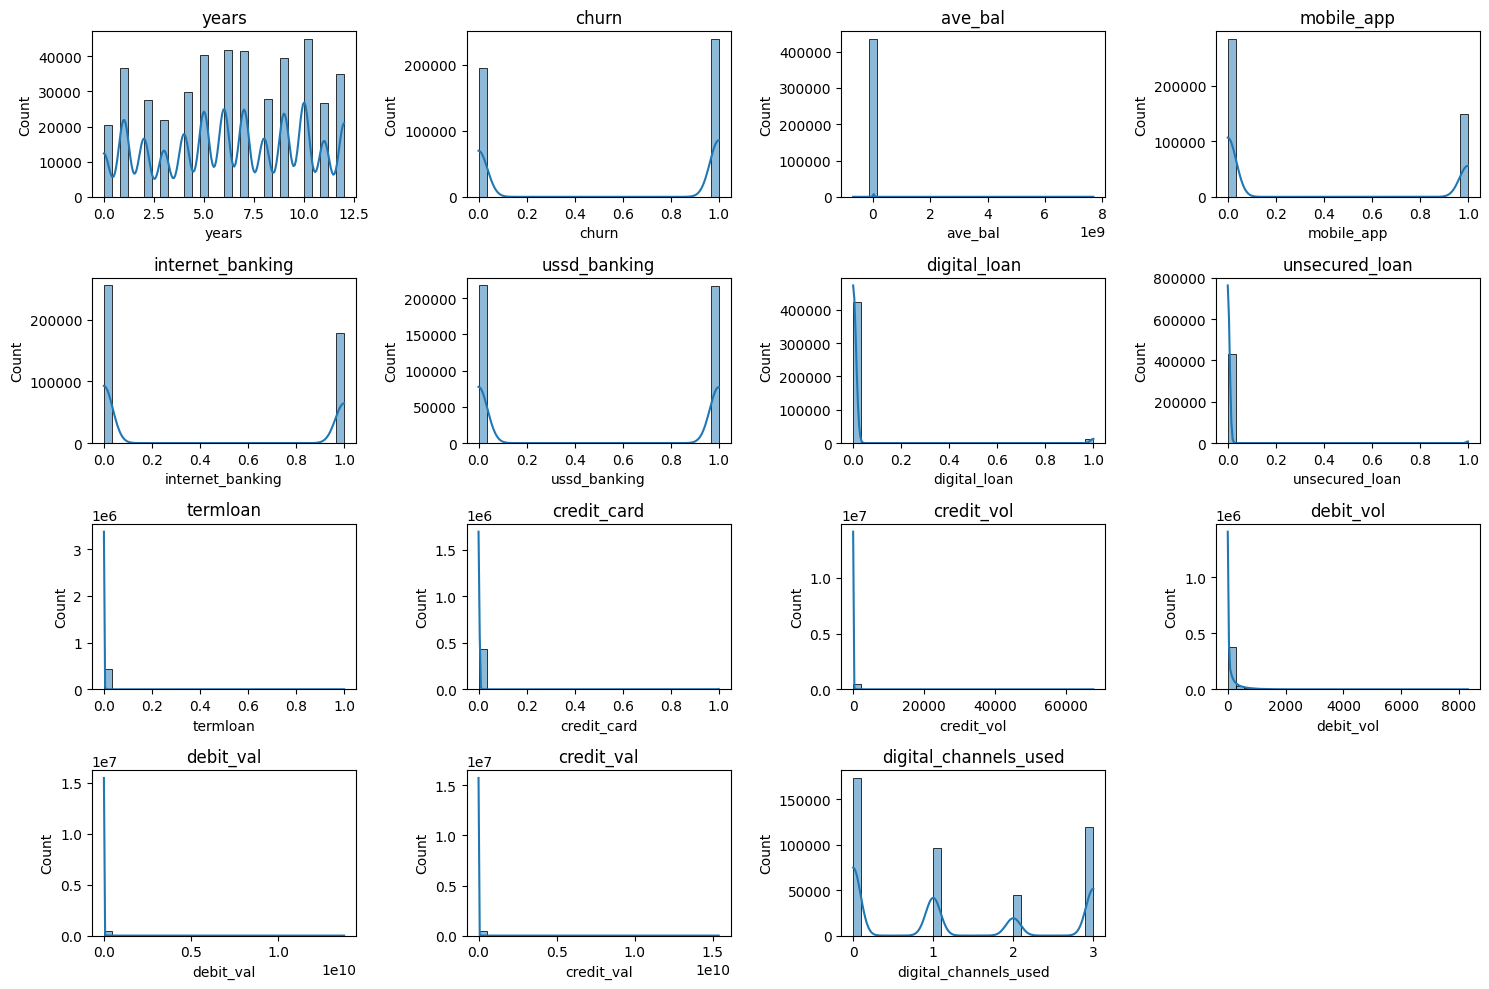

In [7]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

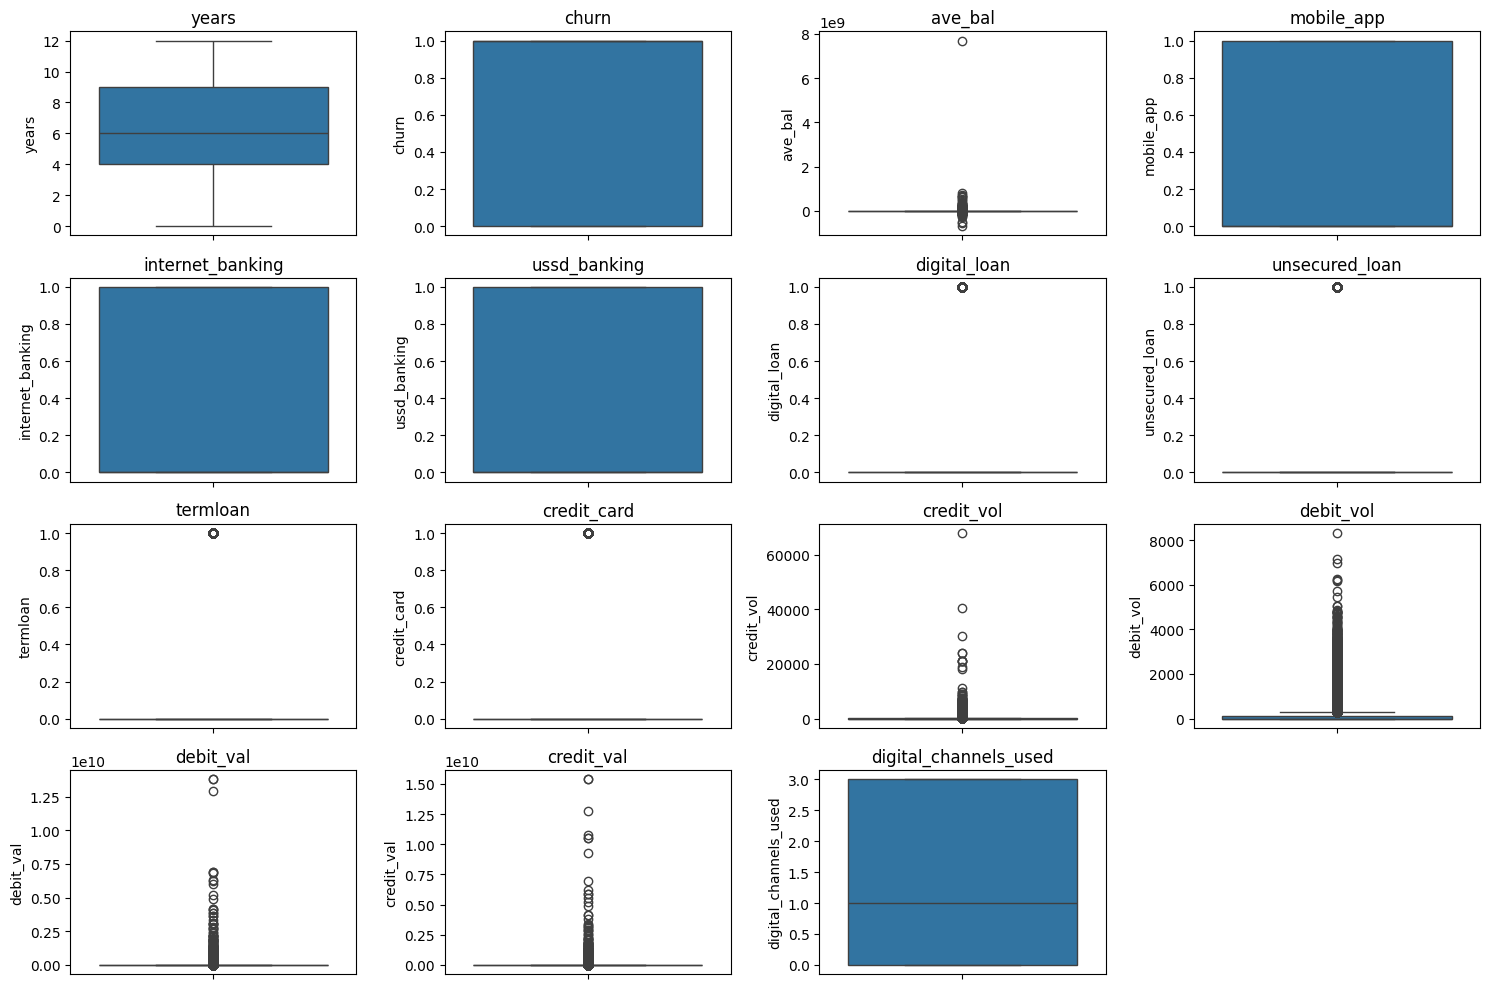

In [8]:
#Boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Statistics Insights

- Negative and zero values
1. Average Balance: Minimum value is -689000000 which indicates overdraft. Some accounts may be taking out loans or having overdrafts from ATM withdrawals, debit card purchases, or automatic payments, with banks sometimes covering the overage and allowing the balance to become negative, incurring fees.
2. Debit Volume and Debit Value: A large no.of accounts with 0 debit transactions show that the account is not being used for debit purposes, leading to not earning transaction commissions from merchants.
3. Credit Volume and Credit Value: A large no.of accounts with 0 credit transactions show that the account is not being used to deposit money into the account.

- Outliers indicated by High Standard Deviations
1. Average Balance: The max value 7.6B is significantly higher than the mean 169,105.9, which shows potential high value individuals.
2. Debit Value and Credit Value: Very High debit value and credit value of 13.7B and 15.3B respectively into accounts indicates that these accounts could be of businesses which have high trade volume throughout the year.

In [9]:
df = pd.read_sql("""
                 select * from customer_churn_summary
                 where ave_bal >= 0
                 """, engine)
df

,acct_id,years,churn,risk,currency,ave_bal,scheme,mobile_app,internet_banking,ussd_banking,digital_loan,unsecured_loan,termloan,credit_card,subsegment,credit_vol,debit_vol,debit_val,credit_val,digital_channels_used
0,Account_0,10,0,LOW,NGN,302.34,ODA,0,0,0,0,0,0,0,product7,0,0,0.00,0.0,0
1,Account_1,7,1,LOW,NGN,640.55,SBA,1,1,0,0,0,0,0,product7,23,84,1641781.54,1650610.0,2
2,Account_2,12,1,MEDIUM,NGN,2549.96,SBA,0,0,1,0,0,0,0,product6,0,2,5427.50,0.0,1
3,Account_3,12,0,MEDIUM,USD,9999.17,ODA,0,1,1,0,0,0,0,product6,0,0,0.00,0.0,2
4,Account_4,12,1,MEDIUM,NGN,455.25,SBA,1,1,1,0,0,0,0,product8,439,116,6768632.00,6784830.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411147,Account_489069,5,0,MEDIUM,NGN,3046.39,SBA,0,0,0,0,0,0,0,product6,0,0,0.00,0.0,0
411148,Account_489070,8,0,MEDIUM,NGN,106.60,ODA,0,0,0,0,0,0,0,product7,0,0,0.00,0.0,0
411149,Account_489071,9,1,LOW,NGN,33.72,SBA,0,0,1,0,0,0,0,product5,142,91,296204.03,294710.0,1
411150,Account_489072,4,0,LOW,NGN,60.58,SBA,1,0,1,0,0,0,0,product5,0,0,0.00,0.0,2


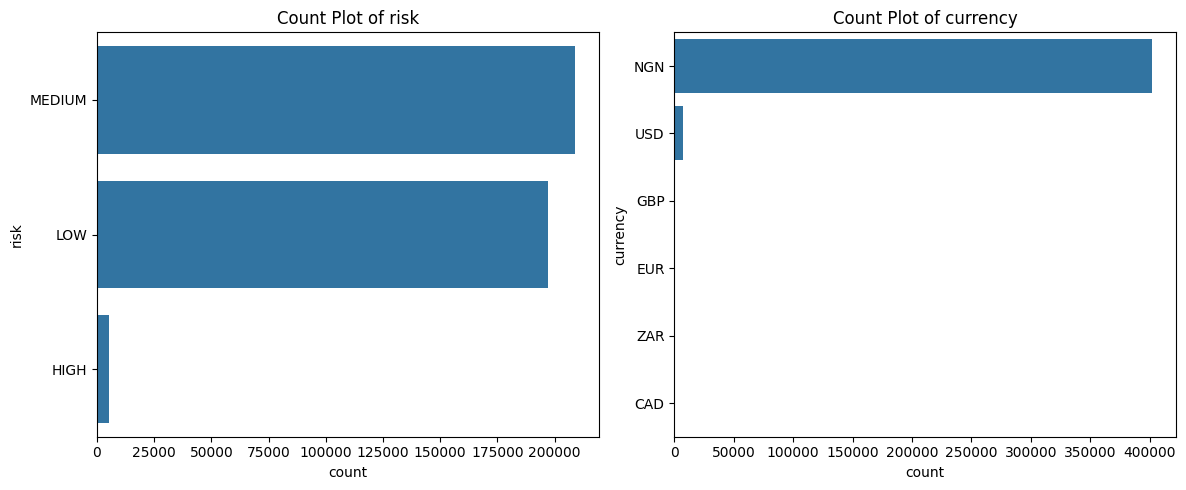

In [10]:
#Count Plots for Categorical Columns
categorical_cols = ["risk", "currency"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(data=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

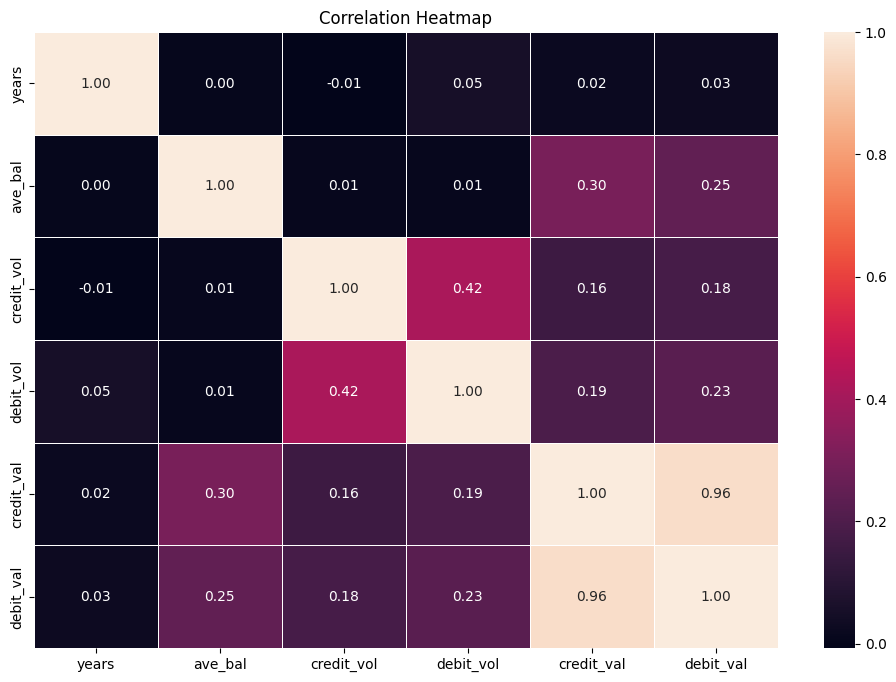

In [11]:
#Correlation Heatmap
numerical_cols = ['years', 'ave_bal', 'credit_vol', 'debit_vol', 'credit_val', 'debit_val']
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(data=correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Correlation Insights

- Credit Value and Debit Value have high correlation with each other, suggesting that the accounts with transactions are actively using the bank's services.
- No. of years has no effect on the accounts usage. This could mean that old accounts necessarily does not mean active users.

In [12]:
churn_rate = round((df['churn'].sum()/df['churn'].count()*100), 2)
print(f"The churn rate is {churn_rate}%.")

The churn rate is 53.97%.


## Data Analysis

### Churn rate is 53.97%. Which customer behaviors are driving churn, and which ones protect against it?

#### Years vs Churn

In [13]:
years_churn = df.groupby('years').agg({'churn' : 'sum'}).reset_index().sort_values(by='churn', ascending=False)
years_churn

,years,churn
1,1,24197
12,12,19861
5,5,19654
6,6,18672
0,0,18191
10,10,18187
2,2,18114
4,4,16768
7,7,15939
9,9,15369


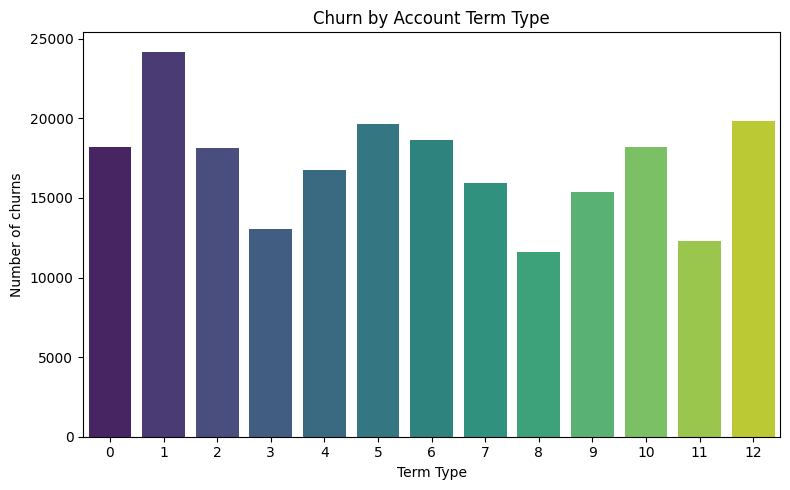

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(data=years_churn, x='years', y='churn', palette='viridis')
plt.title('Churn by Account Term Type')
plt.ylabel('Number of churns')
plt.xlabel('Term Type')
plt.tight_layout()
plt.show()

In [15]:
years_churn['term_type'] = pd.cut(
    years_churn['years'],
    bins=[0, 5, 10, float('inf')],
    labels=['Short_term', 'Mid_term', 'Long_term'],
    right=False
)


In [16]:
years_churn = years_churn.groupby('term_type').agg({'churn' : 'sum'}).reset_index()
years_churn

,term_type,churn
0,Short_term,90330
1,Mid_term,81222
2,Long_term,50357


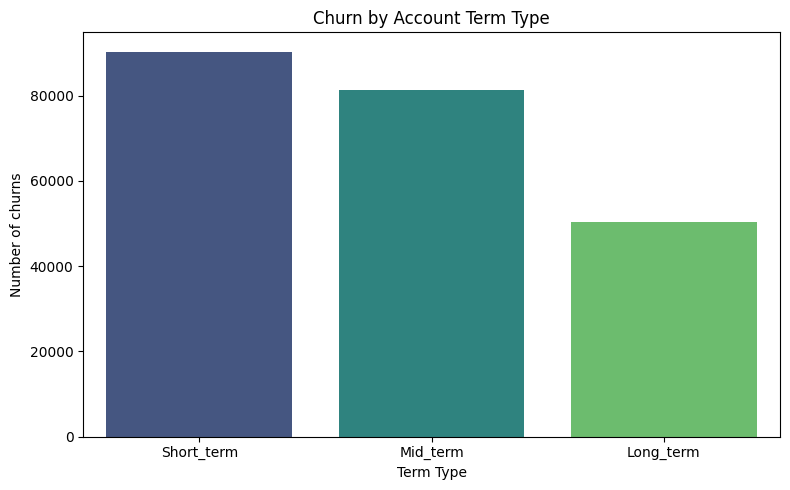

In [17]:
# Plot churn counts by term type
plt.figure(figsize=(8,5))
sns.barplot(data=years_churn, x='term_type', y='churn', palette='viridis')
plt.title('Churn by Account Term Type')
plt.ylabel('Number of churns')
plt.xlabel('Term Type')
plt.tight_layout()
plt.show()

In [18]:
years_churn['churn%'] = years_churn['churn']/years_churn['churn'].sum()*100
years_churn = round(years_churn.sort_values('churn%', ascending = False), 2)
years_churn

,term_type,churn,churn%
0,Short_term,90330,40.71
1,Mid_term,81222,36.60
2,Long_term,50357,22.69


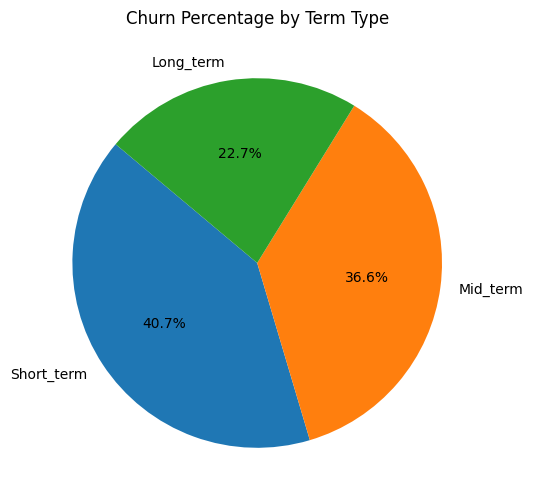

<Figure size 800x600 with 0 Axes>

In [19]:
plt.figure(figsize=(8,6))
plt.pie(years_churn['churn%'], labels=years_churn['term_type'], autopct='%1.1f%%', startangle=140)
plt.title('Churn Percentage by Term Type')
plt.figure(figsize=(8,6))
plt.show()

- Churn peaks at Year 1 which indicates that there could be a marketing gap or an issue with initial onboarding by the bank due to which the bank is not able to keep the customers with them.
- Long term customers churn the least signifying that the product and services are good which customers like and continue with them.

#### Risk vs Churn

In [20]:
risk_churn = df.groupby('risk').agg({"churn" : "sum"}).reset_index().sort_values(by='churn', ascending=False)
risk_churn

,risk,churn
2,MEDIUM,114732
1,LOW,103519
0,HIGH,3658


In [21]:
risk_churn['churn%'] = risk_churn['churn']/(risk_churn['churn'].sum())*100
risk_churn = round(risk_churn.sort_values('churn%', ascending = False), 2)
risk_churn

,risk,churn,churn%
2,MEDIUM,114732,51.70
1,LOW,103519,46.65
0,HIGH,3658,1.65


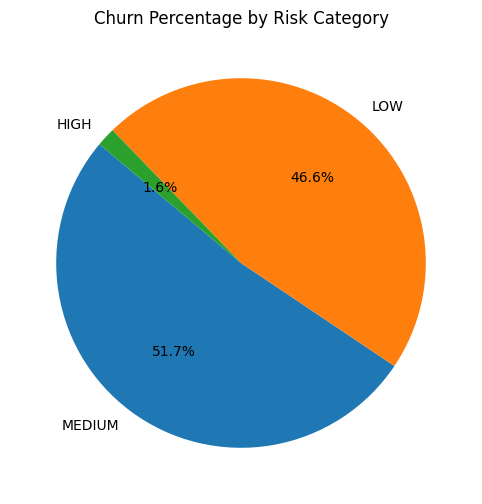

<Figure size 800x600 with 0 Axes>

In [22]:
plt.figure(figsize=(8,6))
plt.pie(risk_churn['churn%'], labels=risk_churn['risk'], autopct='%1.1f%%', startangle=140)
plt.title('Churn Percentage by Risk Category')
plt.figure(figsize=(8,6))
plt.show()

- Medium risk customers churn the most with 51.7% of the total churned customers.

#### Currency vs Churn

In [23]:
currency_churn = df.groupby("currency")['churn'].agg(["sum", 'count'])
currency_churn['churn_rate'] = currency_churn['sum']/currency_churn['count']*100
currency_churn = currency_churn.reset_index().sort_values('churn_rate', ascending=False)
currency_churn = currency_churn[currency_churn['count'] > 400]

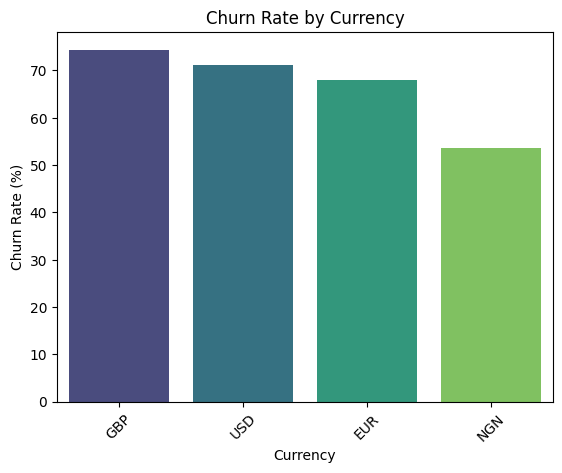

In [24]:
sns.barplot(data=currency_churn, x='currency', y='churn_rate', palette='viridis')
plt.title('Churn Rate by Currency')
plt.xlabel('Currency')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()

- The bank is not losing it's premium customers which have accounts in foreign currencies like USD, GBP, EUR. Although low number might be due to less accounts in general.

#### Scheme vs Churn

In [25]:
scheme_churn = df.groupby('scheme')['churn'].agg(['sum', 'count'])
scheme_churn['churn_rate'] = scheme_churn['sum']/scheme_churn['count']*100
scheme_churn = scheme_churn.reset_index().sort_values('churn_rate', ascending=False)

In [26]:
scheme_churn

,scheme,sum,count,churn_rate
3,TDA,421,421,100.000000
0,CAA,2800,4459,62.794349
2,SBA,167259,292959,57.092972
1,ODA,51429,113313,45.386672


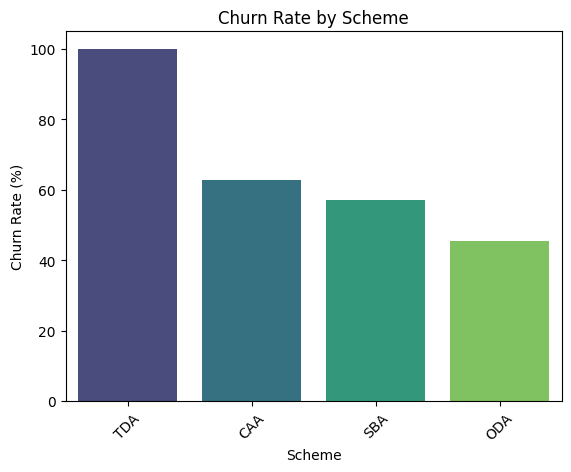

In [27]:
sns.barplot(data=scheme_churn, x='scheme', y='churn_rate', palette='viridis')
plt.title('Churn Rate by Scheme')
plt.xlabel('Scheme')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [28]:
df.groupby(['scheme', 'years']).agg({'churn': 'sum'}).sort_values('churn', ascending=False)

churn
scheme years       
SBA    1      22707
       0      17453
       2      17056
       5      17029
       4      15384
       6      14653
       3      12210
       12     11657
       7      11273
ODA    10     10677
       12      7862
       9       7756
SBA    9       7296
       8       7252
       10      7226
ODA    11      6078
SBA    11      6063
ODA    7       4341
       8       3963
       6       3826
       5       2560
       4       1313
       2        869
       3        800
       1        797
CAA    1        682
ODA    0        587
CAA    8        349
       7        293
       9        291
       10       256
       2        178
       12       173
TDA    12       169
CAA    6        160
       0        142
       11       129
       4         57
       5         47
       3         43
TDA    11        39
       6         33
       7         32
       10        28
       9         26
       8         24
       5         18
       4         14
       1         11
       2         11
       0          9
       3          7

- Churn spikes at year 0-5 for SBA accounts.

## Does digital adoption actually reduce churn, or are we just pushing apps for nothing?

In [29]:
digital_channels_df = df.groupby('digital_channels_used').agg({'churn': 'sum'}).sort_values('churn', ascending=False).reset_index()
digital_channels_df

,digital_channels_used,churn
0,3,94315
1,1,61964
2,0,38787
3,2,26843


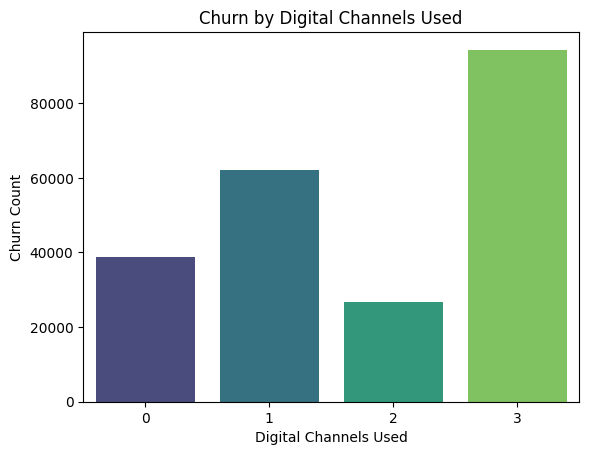

In [30]:
sns.barplot(data=digital_channels_df, x='digital_channels_used', y='churn', palette='viridis')
plt.title('Churn by Digital Channels Used')
plt.xlabel('Digital Channels Used')
plt.ylabel('Churn Count')
plt.show()

- The more an account uses digital banking, they churn more as shown by data where the users with all digital channels usage churn the most. Although the least churned users are the ones which use 2 digital channels, signifying a deep analysis has to be done.

In [31]:
churned = df[df['churn'] == 1]

app_only_c = churned[
    (churned['mobile_app'] == 1) &
    (churned['internet_banking'] == 0) &
    (churned['ussd_banking'] == 0)
]

internet_only_c = churned[
    (churned['mobile_app'] == 0) &
    (churned['internet_banking'] == 1) &
    (churned['ussd_banking'] == 0)
]

ussd_only_c = churned[
    (churned['mobile_app'] == 0) &
    (churned['internet_banking'] == 0) &
    (churned['ussd_banking'] == 1)
]

not_churned = df[df['churn'] == 0]

app_only_nc = not_churned[
    (not_churned['mobile_app'] == 1) &
    (not_churned['internet_banking'] == 0) &
    (not_churned['ussd_banking'] == 0)
]

internet_only_nc = not_churned[
    (not_churned['mobile_app'] == 0) &
    (not_churned['internet_banking'] == 1) &
    (not_churned['ussd_banking'] == 0)
]

ussd_only_nc = not_churned[
    (not_churned['mobile_app'] == 0) &
    (not_churned['internet_banking'] == 0) &
    (not_churned['ussd_banking'] == 1)
]


In [32]:
channel_churn = pd.DataFrame({
    'channel' : ['ussd_only', 'internet_banking_only', 'mobile_only'],
    'churned': [len(ussd_only_c), len(internet_only_c), len(app_only_c)],
    'not_churned': [len(ussd_only_nc), len(internet_only_nc), len(app_only_nc)],
    'total': [len(ussd_only_c)+len(ussd_only_nc), len(internet_only_c)+ len(internet_only_nc), len(app_only_c)+len(app_only_nc)]
})

channel_churn['churn_rate'] = round(channel_churn['churned']/channel_churn['total']*100, 2)
channel_churn

,channel,churned,not_churned,total,churn_rate
0,ussd_only,57281,20390,77671,73.75
1,internet_banking_only,4606,9494,14100,32.67
2,mobile_only,77,309,386,19.95


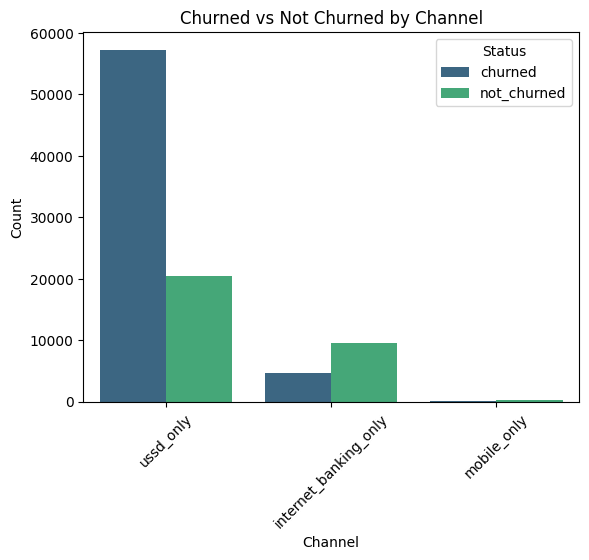

In [33]:
melted = channel_churn.melt(id_vars='channel', value_vars=['churned', 'not_churned'], var_name='Status', value_name='count')
sns.barplot(data=melted, x='channel', y='count', hue='Status', palette='viridis')
plt.title('Churned vs Not Churned by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

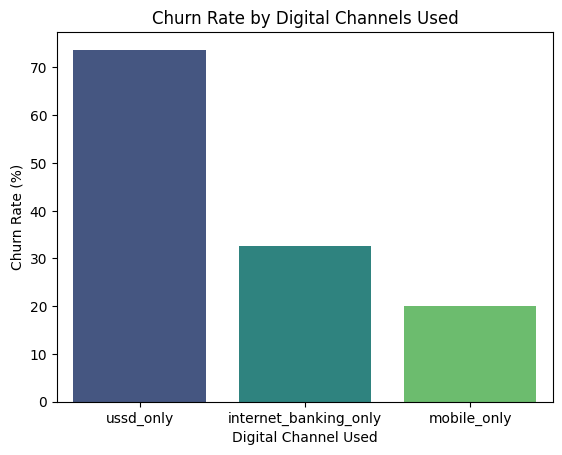

In [34]:
sns.barplot(data=channel_churn, x='channel', y='churn_rate', palette='viridis')
plt.title('Churn Rate by Digital Channels Used')
plt.xlabel('Digital Channel Used')
plt.ylabel('Churn Rate (%)')
plt.show()

- USSD-only users churn more than app users which shows there is feature gap in the service.
- More users must be introduced to Mobile App. The bank can put in efforts to market it's mobile apps to the USSD only users.
- It could also be possible that customers who use USSD banking don't have a smartphone and hence could be not high value customers with less money.

## Which customers should relationship managers prioritize?

- High value + low churn → protect

- High value + high churn → urgent intervention

- Low value + high churn → ignore

Customer Value Score = 0.5 × ave_bal + 0.3 × credit_val + 0.2 × debit_val

In [35]:
customer_val = df.copy()
customer_val['Customer_Value_Score'] = (0.5 * df['ave_bal']) + (0.3 * df['credit_val']) + (0.2 * df['debit_val'])


In [36]:
# Normalise the Customer_Value_Score with Min-Max Scaling
customer_val['Customer_Value_Score'] = (customer_val['Customer_Value_Score'] - customer_val['Customer_Value_Score'].min()) / (customer_val['Customer_Value_Score'].max() - customer_val['Customer_Value_Score'].min())


Segment Customers
- Top 20% : High Value
- Middle 50% : Medium Value
- Bottom 30% : Low value

In [37]:
customer_val['customer_val'] = pd.qcut(
    customer_val['Customer_Value_Score'], q=[0, 0.3, 0.8, 1.0], labels=['Low', 'Medium', 'High'])

In [38]:
customer_val.groupby(['customer_val', 'risk']).agg({'churn': 'sum'})

churn
customer_val risk         
Low          HIGH       14
             LOW      1891
             MEDIUM   1947
Medium       HIGH      693
             LOW     61456
             MEDIUM  74306
High         HIGH     2951
             LOW     40172
             MEDIUM  38479

High Value and Low Risk Customers are silent Churners.
- Personalized, Human Outreach: Instead of automated emails, have Customer Success Managers (CSMs) make a direct, personalized call or email to check in, not to sell.
- "We Miss You" Campaigns with Value: Send personalized messages highlighting new features or unused benefits that are relevant to their specific business use case.
- Feedback Loops: Ask for feedback on why they have gone quiet, using surveys or direct outreach to uncover pain points before they become insurmountable. 
- Milestone-Based Incentives: Reward loyal, long-term customers with exclusive perks, such as access to premium features, loyalty rewards, or early access to new products.

In [39]:
customer_val.groupby(['customer_val','digital_channels_used']).agg({'churn': 'sum'})

churn
customer_val digital_channels_used       
Low          0                       1570
             1                       1343
             2                        294
             3                        645
Medium       0                      32080
             1                      50328
             2                      13562
             3                      40485
High         0                       5137
             1                      10293
             2                      12987
             3                      53185

- The more a High Value customer uses digital channels more is the likelihood of that customer to Churn which is totally opposite of the Low Value Customers.
- This signifies that High value customers need better digital banking features which might not be the case as of now.
- The bank must focus on improving the features and maybe UI of the apps and internet banking website.

## Are foreign currency customers more loyal and profitable?

In [40]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [41]:
cur_ave_bal = (
    df.groupby('currency')
      .agg(
          ave_bal=('ave_bal', 'mean'),
          churn=('churn', 'sum'),
          currency_count=('currency', 'count')
      )
      .sort_values('ave_bal', ascending=False)
      .reset_index()
)
cur_ave_bal['churn_rate'] = round(cur_ave_bal['churn']/cur_ave_bal['currency_count']*100, 2)
cur_ave_bal = cur_ave_bal[cur_ave_bal['currency_count'] > 400]
cur_ave_bal

,currency,ave_bal,churn,currency_count,churn_rate
0,USD,3.246517e+06,5392,7582,71.12
1,GBP,1.325368e+06,637,856,74.42
2,EUR,7.118536e+05,306,450,68.00
4,NGN,1.680980e+05,215531,402191,53.59


In [42]:
import plotly.express as px
# Bubble chart
fig = px.scatter(
    cur_ave_bal,
    x="currency",
    y="churn_rate",
    size="ave_bal",
    hover_name="currency",
    size_max=100,
    title="Churn Rate by Currency (Bubble Size = Average Balance)"
)

fig.update_layout(
    xaxis_title="Currency",
    yaxis_title="Churn Rate"
)

fig.show()


- USD customers have 19x more Average Balance than local NGN customers and 97.49% lower churn.

## If we improve X, how much churn can we realistically reduce?

Increasing mobile app, credit card, internet banking adoption by 20%

In [43]:
mobile_df = df[df['mobile_app'] == 1]
churn_rate_mobile_1 = round((mobile_df['churn'].sum()/df['churn'].count()*100), 2)
churn_rate_mobile_1

np.float64(26.86)

In [44]:
mobile_df = df[df['mobile_app'] == 0]
churn_rate_mobile_0 = round((mobile_df['churn'].sum()/df['churn'].count()*100), 2)
churn_rate_mobile_0

np.float64(27.11)

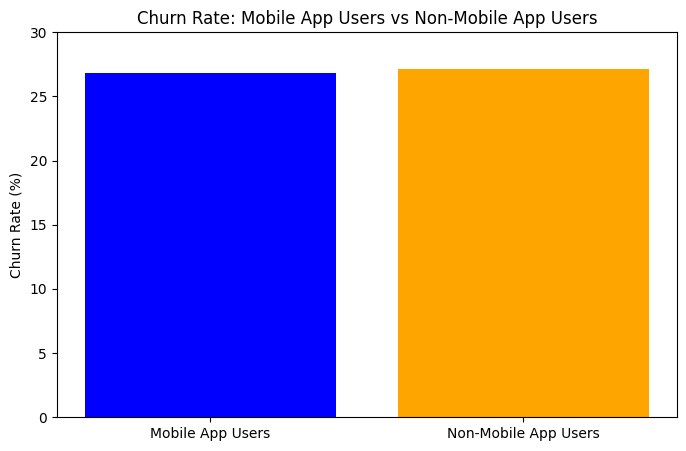

In [45]:
plt.figure(figsize=(8,5))
plt.bar(['Mobile App Users', 'Non-Mobile App Users'], [churn_rate_mobile_1, churn_rate_mobile_0], color=['blue', 'orange'])
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate: Mobile App Users vs Non-Mobile App Users')
plt.ylim(0, 30)
plt.show()

Churn rate:
- App users: 26.86%
- Non-app users: 27.11%


In [46]:
# New churn reduction =
0.20 * (churn_rate_mobile_0 - churn_rate_mobile_1)

np.float64(0.05)

In [47]:
cc_df = df[df['credit_card'] == 1]
churn_rate_cc_1 = round((cc_df['churn'].sum()/df['churn'].count()*100), 2)
churn_rate_cc_1

np.float64(0.04)

In [48]:
cc_df = df[df['credit_card'] == 0]
churn_rate_cc_0 = round((cc_df['churn'].sum()/df['churn'].count()*100), 2)
churn_rate_cc_0

np.float64(53.93)

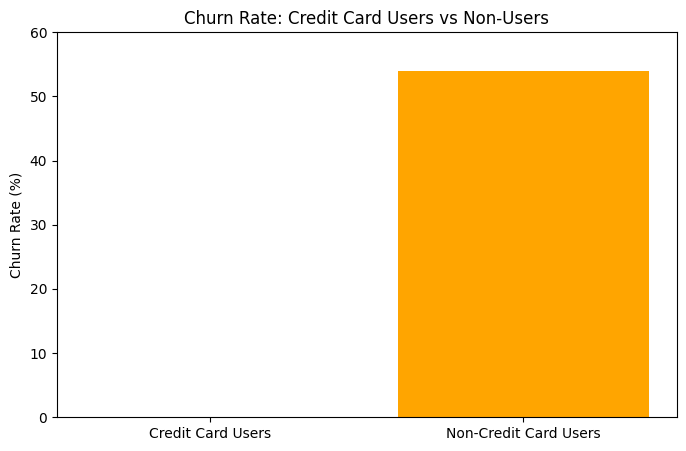

In [49]:
plt.figure(figsize=(8,5))
plt.bar(['Credit Card Users', 'Non-Credit Card Users'], [churn_rate_cc_1, churn_rate_cc_0], color=['blue', 'orange'])
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate: Credit Card Users vs Non-Users')
plt.ylim(0, 60)
plt.show()

In [50]:
# New churn reduction =
0.20 * (churn_rate_cc_0 - churn_rate_cc_1)

np.float64(10.778)

In [51]:
ib_df = df[df['internet_banking'] == 1]
churn_rate_ib_1 = round((ib_df['churn'].sum()/df['churn'].count()*100), 2)
churn_rate_ib_1

np.float64(30.51)

In [52]:
ib_df = df[df['internet_banking'] == 0]
churn_rate_ib_0 = round((ib_df['churn'].sum()/df['churn'].count()*100), 2)
churn_rate_ib_0

np.float64(23.46)

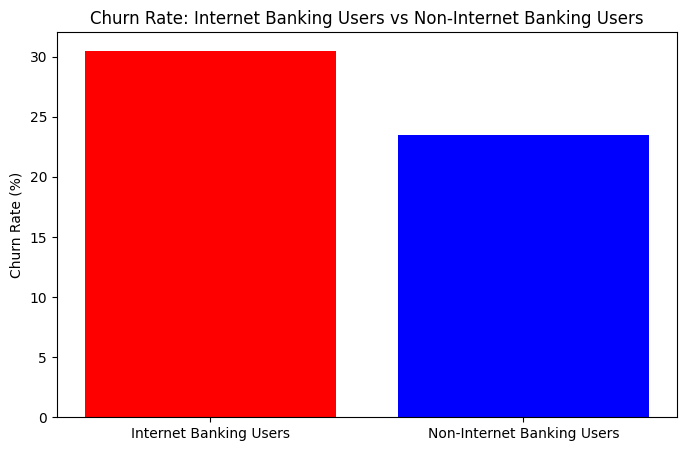

In [53]:
plt.figure(figsize=(8,5))
plt.bar(['Internet Banking Users', 'Non-Internet Banking Users'], [churn_rate_ib_1, churn_rate_ib_0], color=['red', 'blue'])
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate: Internet Banking Users vs Non-Internet Banking Users')
plt.show()

In [54]:
# New churn reduction =
0.20 * (churn_rate_ib_0 - churn_rate_ib_1)

np.float64(-1.4100000000000001)

## Hypothesis Testing

### Question: Does customer churn differ by account currency (NGN, USD, EUR, etc.), or are churn rates the same regardless of currency?

- H₀ (Null hypothesis):
Currency type and churn are independent
(currency has no association with churn)

- H₁ (Alternative hypothesis):
Currency type and churn are associated
(churn differs by currency)

Method: Chi-square test of independence

In [55]:
contingency = df.groupby('currency').agg(
    churned=('churn', 'sum'),
    non_churned=('churn', lambda x: (x == 0).sum())
).reset_index()

contingency['total_customers'] = contingency['churned'] + contingency['non_churned']
contingency = contingency[contingency['total_customers'] >= 100] # Filter currencies with at least 100 customers

In [56]:
from scipy.stats import chi2_contingency

contingency1 = contingency[["churned", "non_churned"]].values

chi2, p, dof, expected = chi2_contingency(contingency1)

print(f"Chi-square statistic: {chi2:.4f}, P-Value: {p}")
if p < 0.05:
    print("Reject H₀ : There is a statistically significant association between currency type and churn.")
else:
    print("Reject H₁: We do not find sufficient evidence that churn differs by currency.")

Chi-square statistic: 1100.4135, P-Value: 2.9604407071238254e-238
Reject H₀ : There is a statistically significant association between currency type and churn.


In [57]:
contingency['churn_rate'] = contingency['churned'] / (contingency['churned'] + contingency['non_churned']) * 100

contingency.sort_values('churn_rate', ascending=False)

,currency,churned,non_churned,total_customers,churn_rate
2,GBP,637,219,856,74.415888
4,USD,5392,2190,7582,71.115801
1,EUR,306,144,450,68.000000
3,NGN,215531,186660,402191,53.589215


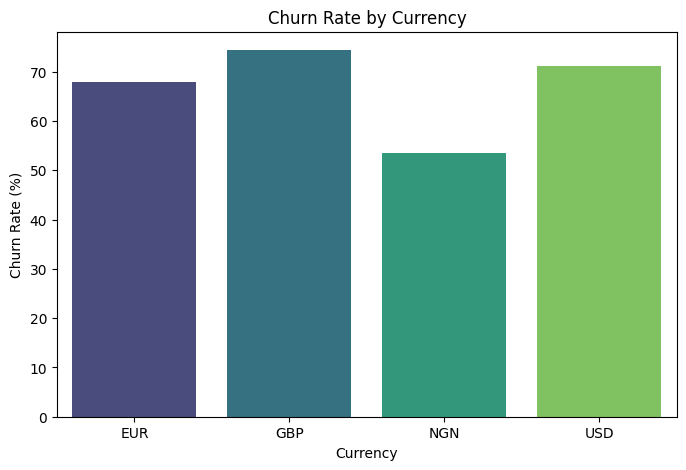

In [58]:
plt.figure(figsize=(8,5))
sns.barplot(data=contingency, x='currency', y='churn_rate', palette='viridis')
plt.xlabel('Currency')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Currency')
plt.show()

- Result : The test indicates a statistically significant association between currency and churn (p < 0.01).
- Key insight:
Foreign Currency Customers churn ~20 percentage points on average more than NGN customers.

#### Business implication:
FX customers represent a more stable segment and should be prioritized for premium retention and cross-sell strategies.